# Notebook for Analysis and Model Development

* **Team :** Data Crew

This is the corresponding jupyter notebook where the model will be developed and stored in order to make predictions on the data.

In [276]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Own Libraries
from utils import *

# Dictionary
from collections import defaultdict

sns.set_style('whitegrid')

## Data Concerns

### Reading data

In [277]:
data = pd.read_csv('../../1. Data/smaller_sample.csv')
event_defs = pd.read_csv('../../1. Data/Event+Definitions.csv')
data

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,2.787130e+08,-1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,4,1.0,NaN
4,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,5,1.0,NaN
...,...,...,...,...,...,...,...,...,...
3246336,-1.948257e+09,-1123823706,First Purchase,5,view_cart,2023-08-29 02:45:54,28,1.0,NaN
3246337,-1.948257e+09,-1123823706,First Purchase,4,browse_products,2023-08-29 02:45:54,29,1.0,NaN
3246338,-1.948257e+09,-1123823706,First Purchase,11,add_to_cart,2023-08-29 02:45:54,30,1.0,NaN
3246339,-1.948257e+09,-1123823706,First Purchase,6,begin_checkout,2023-08-29 02:45:54,31,1.0,NaN


### Cleaning data

* Correcting the journey steps

* Applying the cleaning functions

In [278]:
df = fingerhut_data_cleaner(data, event_defs)
df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,milestone_number,stage
0,278713037,1812321640,2,campaign_click,2021-05-31 06:00:00,1,0.0,Discover
1,278713037,1812321640,19,application_web_view,2021-05-31 23:11:03,2,0.0,Apply for Credit
2,278713037,1812321640,3,application_web_submit,2021-05-31 23:11:51,3,0.0,Apply for Credit
3,278713037,1812321640,19,application_web_view,2021-05-31 23:11:51,4,0.0,Apply for Credit
4,278713037,1812321640,19,application_web_view,2021-05-31 23:11:54,5,0.0,Apply for Credit
...,...,...,...,...,...,...,...,...
2849137,1948257044,1123823706,11,add_to_cart,2023-08-28 18:50:58,8,0.0,First Purchase
2849138,1948257044,1123823706,5,view_cart,2023-08-29 02:45:54,9,0.0,First Purchase
2849139,1948257044,1123823706,4,browse_products,2023-08-29 02:45:54,10,0.0,First Purchase
2849140,1948257044,1123823706,11,add_to_cart,2023-08-29 02:45:54,11,0.0,First Purchase


* Verifying if the data is clean and the sequences are corrected.

In [279]:
has_correct_sequence(df['journey_steps_until_end'])

True

* Deleting promotion created event

In [280]:
idxs = list(df[df['event_name'] == 'promotion_created'].index)

# DROP THE INDEX OF THIS QUERY IN THE DATASET
df.drop(idxs, inplace=True)
df.reset_index(drop=True, inplace=True)

## Sequences (Obtaining sequences)

### Obtaining the sequences with the correct states

* Function for the sequences and the states

In [281]:
result_sequences = split_sequences(df)

* Assigning the probabilities for each state

In [282]:
result_sequences[0:3]

[[2, 19, 3, 19, 19, 3, 19, 19, 19, 3, 19, 12],
 [15],
 [19,
  19,
  19,
  19,
  19,
  19,
  3,
  19,
  19,
  19,
  3,
  12,
  4,
  11,
  4,
  4,
  4,
  11,
  4,
  4,
  5,
  4,
  4,
  11,
  5,
  5,
  5,
  6,
  4,
  4,
  5,
  4,
  4,
  11,
  5,
  4,
  11,
  5,
  4,
  5,
  6,
  7,
  8,
  29,
  4,
  4,
  4,
  11,
  4,
  4,
  11,
  5,
  27,
  5,
  4,
  5,
  4,
  5,
  5,
  6,
  6,
  28]]

### Distribution of the length of the sequences

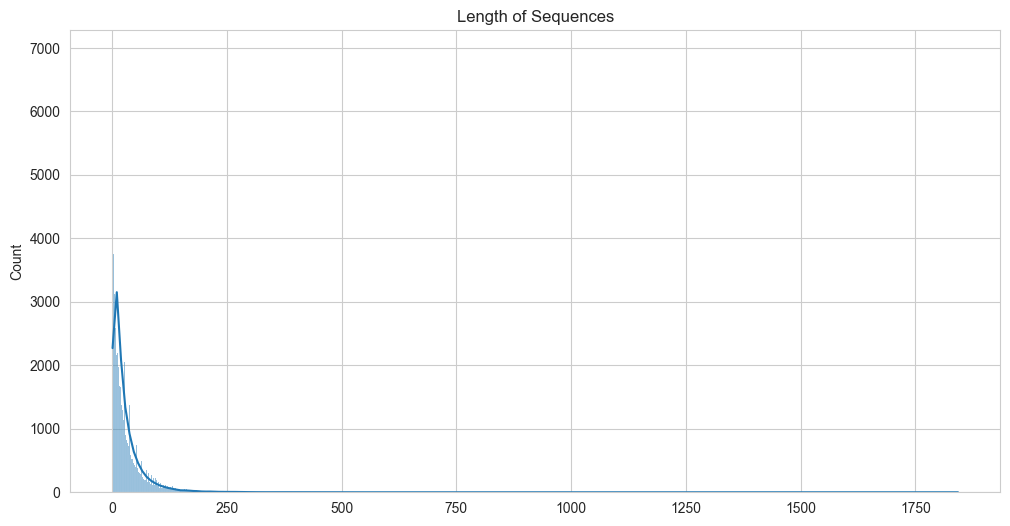

In [283]:
lengths = []
for seq in result_sequences:
    lengths.append(len(seq))
    
plt.figure(figsize=(12, 6))
sns.histplot(lengths, kde=True)
plt.title('Length of Sequences')
plt.show()

## Creating New Data Set for Binary Classification

* By making it suitable for clustering/analysis/classification of the customers without the explicit sequences

My proposal is to create a new dataset with the customer_ids where each instance corresponds to an only customer where the features are descriptive features about the sequences and the stages.

In [284]:
num_unique_cust = len(df['customer_id'].unique())
print(f'Number of unique customers: {num_unique_cust}')

Number of unique customers: 83282


Ideas of more features to be added:   
* Avg length of the sequence (avg in case has more than one, otherwise the length of the unique sequence) ✅
* Has more than one journey ✅
* Number of journeys ✅
* Has order shipped ✅
* Highest milestone reached ✅
* Has credit approved ✅
* Has first purchase ✅
* Has down payment ✅
* Has order shipped ✅
* max number of journey_steps_until_end ✅
* Most repeated event in the journey ✅
* Time between the application and first purchase, then time from the first purchase to down payment and then down payment to order shipped

* number of attempts (applying for a credit)
* Returning customer
* Has an ideal journey

### Trying to use Dask for improving the vectorized operations and the parallelism

This particular library will be very useful in case we handle operations with the original data.

Ofc the following **benchmark** is designed thinking on the original data and not the sample, because as we may not parallelize the operations with very few data could be even slower or not worth it.

In [285]:
import dask.dataframe as dd
import time
# import dask.array as da

df_dask = dd.from_pandas(df, npartitions=4)

# Testing the parallel computation
time_init = time.time()
result = df_dask['journey_steps_until_end'] * df_dask['ed_id'].sum()  # Compute sum(x * y) in parallel
time_end = time.time()

print(result.compute())
print(f'Time: {time_end - time_init}')

0           22410676
1           44821352
2           67232028
3           89642704
4          112053380
             ...    
2506807    179285408
2506808    201696084
2506809    224106760
2506810    246517436
2506811    268928112
Name: journey_steps_until_end, Length: 2506812, dtype: int64
Time: 0.001996755599975586


In [286]:
time_init = time.time()
result = df['journey_steps_until_end'] * df['ed_id'].sum()  # Compute sum(x * y) in parallel
time_end = time.time()

print(result)
print(f'Time: {time_end - time_init}')

0           22410676
1           44821352
2           67232028
3           89642704
4          112053380
             ...    
2506807    179285408
2506808    201696084
2506809    224106760
2506810    246517436
2506811    268928112
Name: journey_steps_until_end, Length: 2506812, dtype: int64
Time: 0.004804134368896484


### Feature Engineering

* Functions

In [287]:
def number_journeys_and_max(cus_df):
    """Function to check the number of journeys in a sequence

    Args:
        seq (list): List of values

    Returns:
        int: Number of journeys in the sequence
    """
    j_steps = cus_df['journey_steps_until_end']
    ones = [i for i, x in enumerate(j_steps) if x == 1]
    return len(ones), max(j_steps)

def has_discover(cust_df):
    """Function to check if a sequence has the discovery event

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        bool: True if the sequence has the discovery event, False otherwise
    """
    return 'Discover' in list(cust_df['stage'])

def number_accounts(cust_df):
    """Function to add the number of accounts to the dataset

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        pd.DataFrame: Dataset with the number of accounts in a new column
    """
    return cust_df['account_id'].nunique()

def has_more_one_journey(j_steps):
    """Function to check if a sequence has repeated values

    Args:
        seq (list): List of values

    Returns:
        bool: True if there are repeated values, False otherwise
    """
    return len(j_steps) != len(set(j_steps))

def most_repeated_event(cust_df):
    """Function that returns the most repeated event in a sequence

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        str: The most repeated event in the sequence
    """
    return cust_df['ed_id'].mode()[0]

def average_length_seq(cust_df):
    """Function to add the average length of the sequences to the dataset

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        pd.DataFrame: Dataset with the average length of the sequences in a new column
    """
    new_df = cust_df.copy()
    # Split the sequences
    sequences = split_sequences(new_df)
    return np.mean([len(seq) for seq in sequences])

def has_prospecting(cust_df):
    """Function to check if a sequence has the prospecting event

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        bool: True if the sequence has the prospecting event, False otherwise
    """
    evnts = list(cust_df['ed_id'])
    return 20 in evnts or 21 in evnts or 24 in evnts

def has_pre_application(cust_df):
    """Function to check if a sequence has the pre-application event

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        bool: True if the sequence has the pre-application event, False otherwise
    """
    return 22 in list(cust_df['ed_id'])

def initial_device(cust_df):
    """Function to get the initial device of a customer
    """
    events = set(cust_df['event_name'])
    phone = ['phone' in event for event in events]
    web = ['web' in event for event in events]
    
    if np.array(phone).any() and np.array(web).any():
        return 3
    elif np.array(phone).any():
        return 1
    elif np.array(web).any():
        return 2
    
def has_approved(cust_df):
    """Function to check if a sequence has the approved event

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        bool: True if the sequence has the approved event, False otherwise
    """
    x = set(cust_df['ed_id'])
    return 15 in x or 12 in x

def get_first_n_events(cust_df, n = 10):
    """Function that returns the first 10 events of a sequence

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        list: The first 10 events of the sequence, padded with np.nan if necessary
    """
    events = cust_df['ed_id'].head(n).tolist()
    # Pad with np.nan if the sequence has fewer than 10 events
    #events += [np.nan] * (10 - len(events))
    return np.array(events)

In [288]:
def which_milestones(cust_df):
    """Function that returns in a tuple in the following sequence the next statemens:
    - If the customer has applied for credit and it has been approved (milestone 1)
    - If the customer has first purchase (milestone 2)
    - If the customer has account activitation (milestone 3)
    - If the customer has downpayment received (milestone 4)
    - If the customer has downpayment cleared (milestone 5)
    - If the customer has order shipped (milestone 6)

    Args:
        cust_df (_type_): _description_
    """
    milestones = set(cust_df['milestone_number'].unique())
    max_milestone = max(milestones)
    return (1 in milestones, 2 in milestones, 3 in milestones, 4 in milestones, 5 in milestones, 6 in milestones), max_milestone

# Functions for time
def get_idxs(cust_df, stage, milestone = -1):
    """Function to get the indexes of a certain stage

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        list: List with the indexes of a certain stage
    """
    if milestone != -1:
        return list(cust_df[cust_df['milestone_number'] == milestone].index)
    
    return list(cust_df[cust_df['stage'] == stage].index)

def time_in_discover(cust_df, seconds_differences):
    """Function to calculate the time between events

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        list: List with the time between events
    """
    idxs = get_idxs(cust_df, 'Discover')
    
    time_in = []
    for idx in idxs:
        if idx + 1 < len(seconds_differences):
            time_in.append(seconds_differences[idx + 1])
        else:
            time_in.append(0)
    return sum(time_in)

def time_in_apply(cust_df, seconds_differences):
    """Function to calculate the time between events

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        list: List with the time between events
    """
    idxs = get_idxs(cust_df, 'Apply for Credit')
    
    time_in = []
    for idx in idxs:
        if idx + 1 < len(seconds_differences):
            time_in.append(seconds_differences[idx + 1])
        else:
            time_in.append(0)
    return sum(time_in)

def time_reach_milestone1(cust_df, seconds_differences):
    """Function to calculate the time between events

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        list: List with the time between events
    """
    idxs = get_idxs(cust_df, 'Apply for Credit', 1)
    
    # sum all the times before the milestone
    return sum(seconds_differences[1:idxs[0]+1])

* 1. Groupby Approach:     
    This avoids repeated filtering and improves efficiency.

In [290]:
def group_by_approach(cust_df):
    cust_df = cust_df.reset_index(drop=True)
    # applying all the functions to get the data
    num_journeys, max_journey = number_journeys_and_max(cust_df)
    discover = has_discover(cust_df)
    numb_accs = number_accounts(cust_df)
    more_one_journey = has_more_one_journey(cust_df['journey_steps_until_end'])
    repeated_event = most_repeated_event(cust_df)
    avg_length_journey = average_length_seq(cust_df)
    has_pros = has_prospecting(cust_df)
    pre_applic = has_pre_application(cust_df)
    device = initial_device(cust_df)
    x = cust_df['event_timestamp'].diff().dt.total_seconds().tolist()
    time_disc = time_in_discover(cust_df, x)
    time_apply = time_in_apply(cust_df, x)
    # time_milestone1 = time_reach_milestone1(cust_df, x)
    
    milestones, max_milestone = which_milestones(cust_df)
    
    # Creating the new data frame
    new_df = pd.DataFrame({'num_journeys': num_journeys,
                           'max_journey': max_journey,
                           'discover': discover, 
                           'number_accounts': numb_accs,
                           'one_more_journey': more_one_journey,
                           'most_repeated_event': repeated_event,
                           'average_length_seq': avg_length_journey,
                           'approved_credit': milestones[0],
                           'first_purchase': milestones[1],
                           'account_activitation': milestones[2],
                           'downpayment_received': milestones[3],
                           'downpayment_cleared': milestones[4],
                           'order_ships': milestones[5],
                           'max_milestone': max_milestone,
                            'has_prospecting': has_pros,
                            'has_pre_application': pre_applic,
                            'initial_device': device,
                            'time_in_discover': time_disc,
                            'time_in_apply': time_apply,
                            #'time_reach_milestone_1': time_milestone1,
                           'index':[0]})
    return new_df    

def get_classification_dataset(data, event_defs, n_events = 10):
    df = fingerhut_data_cleaner(data, event_defs)
    # drop the promotion_created event
    idxs = list(df[df['event_name'] == 'promotion_created'].index)
    df.drop(idxs, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Grouping by the customer id and gathering the data
    new_df = df.groupby('customer_id').apply(group_by_approach)
    new_df.drop(columns=['index'], inplace=True)
    
    # Adding the first n events
    x = list(df.groupby('customer_id').apply(get_first_n_events, n = n_events))
    new_df['first_' + str(n_events) + '_events'] = x
    
    return new_df

* Approx Time : 1 minute or less

In [291]:
# New dataset
new_df = get_classification_dataset(data, event_defs, n_events = 3)
new_df

,,num_journeys,max_journey,discover,number_accounts,one_more_journey,most_repeated_event,average_length_seq,approved_credit,first_purchase,account_activitation,downpayment_received,downpayment_cleared,order_ships,max_milestone,has_prospecting,has_pre_application,initial_device,time_in_discover,time_in_apply,first_3_events
customer_id,,,,,,,,,,,,,,,,,,,,,
5414,0,1,27,True,1,False,4,24.0,True,False,False,False,False,False,1.0,True,False,2,4544216.0,549.0,"[21, 12, 4]"
26746,0,1,5,True,1,False,2,3.0,True,False,False,False,False,False,1.0,True,False,2,35426.0,5990974.0,"[2, 12, 21]"
43085,0,1,30,True,1,False,5,30.0,True,True,True,True,True,True,6.0,False,False,2,16713.0,414.0,"[29, 2, 12]"
61659,0,1,7,True,1,False,4,7.0,True,False,False,False,False,False,1.0,False,False,2,1030982.0,16974.0,"[12, 23, 4]"
67034,0,1,22,True,1,False,19,17.0,True,False,False,False,False,False,1.0,True,False,2,8512.0,506.0,"[2, 19, 19]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147283220,0,1,12,True,1,False,4,11.0,True,False,False,False,False,False,1.0,True,False,2,1620000.0,105.0,"[12, 4, 4]"
2147340717,0,1,11,False,1,False,21,8.0,True,False,False,False,False,False,1.0,True,False,2,0.0,74557.0,"[12, 24, 4]"
2147417277,0,1,15,False,1,False,3,13.0,True,False,False,False,False,False,1.0,False,False,2,0.0,23968.0,"[12, 6, 11]"


* This next command keeps the dataset in your local working directory.

In [294]:
new_df.to_csv('new_dataset.csv', index=False)

## Analysis

The following analysis is pending to be done.

Good ideas for further analysis:

* Go further in the analysis in the people that had applied for a credit and did not get it

* Figure out if we add rows with the same event name in a very small (but different) time difference (e.g. 1 second) to the dropping criteria. Example: